In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import Lasso, LassoCV
import scipy.stats as stats
import statsmodels.stats.api as sms

In [44]:
os.chdir('C:/Users/Mayin\Documents/1GRADUATE/1. Study/2. 24Spring/5224 Bayesian Statistics/5224_Project/Bayesian-Statistics-Project/')
data = pd.read_csv('data.csv')

In [45]:
# Data Discritization
summary = data.describe()
summary

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


In [47]:
# data standardization
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and it's already loaded
scaler = MinMaxScaler()

for col in data.columns:
  if data[col].dtype in ['int64', 'float64']:
    data[col] = scaler.fit_transform(data[[col]])

In [48]:
# data visulization
y = data['GY']
x = data.drop(['GY','Cultivar'], axis=1)

In [50]:
x

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG
0,0.0,0.000000,0.237288,0.416667,0.758755,0.204531,0.062500,0.558140,0.282662
1,0.0,0.333333,0.233051,0.322917,0.795720,0.231592,0.065374,0.790698,0.164493
2,0.0,0.666667,0.334746,0.520833,0.780156,0.244179,0.077586,0.744186,0.244547
3,0.0,1.000000,0.268432,0.420312,0.778210,0.226762,0.068247,0.697674,0.241061
4,0.0,0.000000,0.711864,0.562500,0.764591,0.196979,0.058190,0.813953,0.208343
...,...,...,...,...,...,...,...,...,...
315,1.0,1.000000,0.862924,0.475521,0.540175,0.143486,0.064655,0.380233,0.091410
316,1.0,0.000000,0.355932,0.489583,0.542802,0.189113,0.091236,0.372093,0.209467
317,1.0,0.333333,0.360169,0.541667,0.939689,0.351479,0.099138,0.395349,0.226895
318,1.0,0.666667,0.237288,0.395833,0.643969,0.208936,0.082615,0.209302,0.328986


In [51]:
# LASSO
# candidate lambdas
Lambdas = np.logspace(-5, 2, 200)

# store coeddicients
lasso_cofficients = []
for Lambda in Lambdas:
    lasso = Lasso(alpha=Lambda, normalize=True, max_iter=10000)
    lasso.fit(x, y)
    lasso_cofficients.append(lasso.coef_)

c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previou

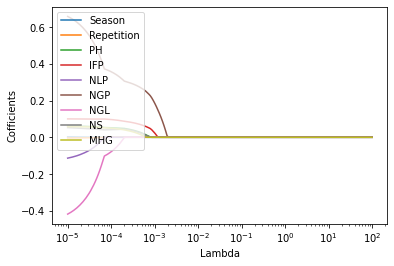

In [52]:
# Plot lambda
plt.plot(Lambdas, lasso_cofficients)

# log x-axis
plt.xscale('log')

plt.xlabel('Lambda')
plt.ylabel('Cofficients')
plt.legend(x.columns)
plt.show()

In [53]:
# Cross Validation: 10-fold
lasso_cv = LassoCV(alphas=Lambdas, normalize=True, cv=10, max_iter=10000)
lasso_cv.fit(x, y)
# best lambda
lasso_best_alpha = lasso_cv.alpha_  
print("best_lambda:", lasso_best_alpha)

best_lambda: 0.001289890261253308


c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [54]:
lasso = Lasso(alpha=lasso_best_alpha, normalize=True, max_iter=10000)
lasso.fit(x, y)

c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.001289890261253308, max_iter=10000, normalize=True)

In [55]:
# return coefficients
lasso_coeff = pd.Series(index=['Intercept'] + x.columns.tolist(), data=[lasso.intercept_] + lasso.coef_.tolist())
# sort the coefficients from highest absolute value to lowest
df = pd.DataFrame({
    'original_coeff': lasso_coeff,
    'abs_coeff': lasso_coeff.abs()
})

sorted_lasso_coeff = df.sort_values(by='abs_coeff', ascending=False)['original_coeff']

print(sorted_lasso_coeff)

Intercept     0.536607
NGP           0.129404
Season       -0.000000
Repetition   -0.000000
PH            0.000000
IFP           0.000000
NLP           0.000000
NGL           0.000000
NS            0.000000
MHG           0.000000
Name: original_coeff, dtype: float64


In [56]:
## random foretst

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest model
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(x, y)

# Print feature importance
# Print feature importance
importances = clf.feature_importances_
for i in range(len(importances)):
  print(f"Feature {x.columns[i]}: {importances[i]}")

Feature Season: 0.03580637213334253
Feature Repetition: 0.018728523238945458
Feature PH: 0.10774617618456304
Feature IFP: 0.13083535882284747
Feature NLP: 0.11390371026955366
Feature NGP: 0.12974107909029672
Feature NGL: 0.12534817518718802
Feature NS: 0.14566472372132283
Feature MHG: 0.19222588135194016


In [58]:
### OLS
import statsmodels.api as sm

In [59]:
x_sel= x[['NGP','MHG']]
x_sel = sm.add_constant(x_sel)
model = sm.OLS(y, x_sel).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     GY   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     10.39
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           4.24e-05
Time:                        19:12:33   Log-Likelihood:                 167.33
No. Observations:                 320   AIC:                            -328.7
Df Residuals:                     317   BIC:                            -317.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4828      0.022     22.131      0.0

In [64]:
import patsy

# Create design matrices
# np.power(NGP, 2) +
y, X = patsy.dmatrices('y ~ NGP + MHG + np.power(MHG, 2) + NGP:MHG', data=x)

# Fit a linear model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.568
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.42e-06
Time:                        19:13:49   Log-Likelihood:                 173.69
No. Observations:                 320   AIC:                            -337.4
Df Residuals:                     315   BIC:                            -318.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3383      0.046  